In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [5]:
train_datagen_nor = ImageDataGenerator(
        rescale=1./255)

test_datagen_nor = ImageDataGenerator(validation_split=0.5,
       
        rescale=1./255)

train_data = train_datagen_nor.flow_from_directory(r'D:\Uni-passau\thesis-smalldataset\dataset-50\train',target_size=(512,512), 
                                                       batch_size=32, class_mode='categorical')
valid_data = test_datagen_nor.flow_from_directory(r'D:\Uni-passau\thesis-smalldataset\dataset-50\test',target_size=(512,512), 
                                                       subset='validation',batch_size=32, class_mode='categorical')


Found 3848 images belonging to 50 classes.
Found 650 images belonging to 50 classes.


In [6]:
from keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.layers import GaussianNoise
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters = 8, kernel_size = (5,5), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu', input_shape = (512,512,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(filters = 48, kernel_size = (5,5), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = 2))
model.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = (3,3),kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.Conv2D(filters = 192, kernel_size = (3,3), kernel_regularizer=l2(0.01), padding = 'Same', activation ='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides= 2))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation = "relu", kernel_regularizer=l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation = "relu", kernel_regularizer=l2(0.01)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(50, activation = "softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 512, 512, 8)       608       
_________________________________________________________________
batch_normalization (BatchNo (None, 512, 512, 8)       32        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 512, 512, 48)      9648      
_________________________________________________________________
batch_normalization_1 (Batch (None, 512, 512, 48)      192       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 48)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 128)     55424     
_________________________________________________________________
batch_normalization_2 (Batch (None, 256, 256, 128)     5

In [7]:
import tensorflow.compat.v1 as tfs
gpu_options = tfs.GPUOptions(allow_growth = True)
session = tfs.InteractiveSession(config = tfs.ConfigProto(gpu_options = gpu_options))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [9]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import CSVLogger

csv = CSVLogger("/content/drive/MyDrive/normal-cnn-50/cnn-50-model_history_log(normal).csv", append=True)
es1= tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3, restore_best_weights=True)
mc = ModelCheckpoint('/content/drive/MyDrive/normal-cnn-50/cnn-50-model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [7]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, decay = 0.9)
model.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [11]:
history = model.fit(train_data,epochs=300,shuffle=True,validation_data=valid_data,callbacks=[csv,es1,mc])

Epoch 1/300
118/118 [==============================] - 123s 906ms/step - loss: 11.1511 - accuracy: 0.1554 - val_loss: 11.8002 - val_accuracy: 0.0431

Epoch 00001: val_accuracy improved from -inf to 0.04308, saving model to /content/drive/MyDrive/normal-cnn-50/cnn-50-model.h5
Epoch 2/300
118/118 [==============================] - 102s 864ms/step - loss: 10.3085 - accuracy: 0.3372 - val_loss: 11.7246 - val_accuracy: 0.0538

Epoch 00002: val_accuracy improved from 0.04308 to 0.05385, saving model to /content/drive/MyDrive/normal-cnn-50/cnn-50-model.h5
Epoch 3/300
118/118 [==============================] - 102s 863ms/step - loss: 10.1116 - accuracy: 0.4020 - val_loss: 10.9074 - val_accuracy: 0.1877

Epoch 00003: val_accuracy improved from 0.05385 to 0.18769, saving model to /content/drive/MyDrive/normal-cnn-50/cnn-50-model.h5
Epoch 4/300
118/118 [==============================] - 102s 862ms/step - loss: 10.0325 - accuracy: 0.4242 - val_loss: 9.9564 - val_accuracy: 0.7938

Epoch 00004: val_

In [26]:
model.save_weights('/content/drive/MyDrive/normal-cnn-50/cnn_dataset-50_weights.h5')

In [8]:
model.load_weights(r'D:\Uni-passau\thesis-results\50-dataset\normal-cnn\cnn_dataset-50_weights.h5')

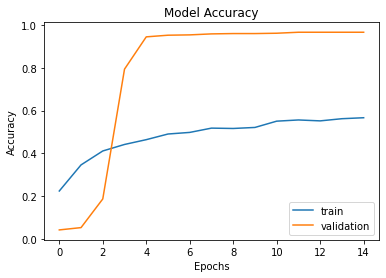

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/normal-cnn-50/cnn_dataset-50-accuracy.png')
plt.show()

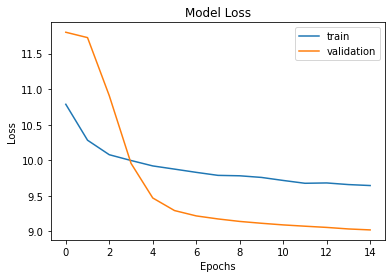

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.savefig('/content/drive/MyDrive/normal-cnn-50/cnn_dataset-50-loss.png')
plt.show()

In [6]:
test_datagen_nor = ImageDataGenerator(rescale=1./255)

test_datagen_aug =  ImageDataGenerator(width_shift_range=0.15,validation_split=0.5,
        height_shift_range=0.15,
        horizontal_flip=True,rotation_range=10,
        rescale=1./255)

In [ ]:
## train and valid

In [12]:
train_acc=model.evaluate(train_data)
val_acc = model.evaluate(valid_data)
print("Train_Accuracy: %.2f%%" % (train_acc[1]*100))
print("valid_Accuracy: %.2f%%" % (val_acc[1]*100))

21/21 [==============================] - 10s 477ms/step - loss: 9.0716 - accuracy: 0.9662
Train_Accuracy: 97.31%
valid_Accuracy: 96.62%


In [60]:
test_genrator_nor = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\dataset-50\test',
        target_size=(512, 512),
        batch_size=100,
        class_mode='categorical')


Found 1300 images belonging to 50 classes.
Found 1300 images belonging to 50 classes.


In [65]:
x_test =[]
y_test =[]
len = int(1300/100)
print(len)
for i in range(len):
  x,y = next(test_genrator_nor)
  x_test.append(x)
  y_test.append(y)

13


In [66]:
import numpy as np
X_test =np.array(x_test)
Y_test = np.array(y_test)
print(Y_test.shape,X_test.shape)

(13, 100, 50) (13, 100, 512, 512, 3)


In [67]:
import numpy as np
n,batches,hei,wid,col=np.array(X_test).shape
X=np.array(X_test).reshape(n*batches,hei,wid,col)
x,y,z=np.array(Y_test).shape
Y =np.array(Y_test).reshape(x*y,z)
print(Y.shape,X.shape)

(1300, 50) (1300, 512, 512, 3)


In [68]:
Y_pred = model.predict(X)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1)


In [69]:
Y_classes = np.argmax(Y,axis = 1)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(Y_classes, Y_pred_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       0.93      1.00      0.96        26
           2       1.00      1.00      1.00        26
           3       1.00      1.00      1.00        26
           4       0.83      0.96      0.89        26
           5       1.00      1.00      1.00        26
           6       0.67      1.00      0.80        26
           7       1.00      1.00      1.00        26
           8       1.00      1.00      1.00        26
           9       1.00      1.00      1.00        26
          10       1.00      0.88      0.94        26
          11       0.96      1.00      0.98        26
          12       0.76      1.00      0.87        26
          13       1.00      1.00      1.00        26
          14       1.00      1.00      1.00        26
          15       1.00      1.00      1.00        26
          16       1.00      1.00      1.00        26
          17       1.00    

C:\Users\reshm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,f1_score
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_classes, Y_pred_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_classes, Y_pred_classes,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_classes, Y_pred_classes,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_classes, Y_pred_classes,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.970000
Precision: 0.955770
Recall: 0.970000
F1 score: 0.961512


In [18]:
## normal dataset

In [ ]:
test_genrator_nor = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset/test',
        target_size=(512, 512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Test_Accuracy: 97.34%


In [ ]:
## normal data with augumentation

In [20]:
test_genrator_aug = test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset-50/nor-dataset-50/test',
        target_size=(512,512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_aug)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 73s 2s/step - loss: 12.1198 - accuracy: 0.0231
Test_Accuracy: 2.31%


In [ ]:
## gaussian noise

In [ ]:
test_genrator_gau_nor = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/gaussian-50/test',
        target_size=(512, 512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_nor)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 968s 24s/step - loss: 2.4091 - accuracy: 0.5231
Test_Accuracy: 52.31%


In [ ]:
## gaussian noise auguemntation

In [ ]:
test_genrator_gau_augmen = test_datagen_aug.flow_from_directory( r'/content/drive/MyDrive/dataset-50/gaussian-50/test',
        target_size=(512, 512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_gau_augmen)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 118s 3s/step - loss: 5.4716 - accuracy: 0.0246
Test_Accuracy: 2.46%


In [ ]:
## salt and pepper

In [23]:
test_genrator_salt = test_datagen_nor.flow_from_directory( r'/content/drive/MyDrive/dataset-50/saltandpepper',
        target_size=(512,512),
        batch_size=32,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_salt)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 646s 16s/step - loss: 11.2959 - accuracy: 0.1346
Test_Accuracy: 13.46%


In [ ]:
## corrupted-10

In [ ]:
test_genrator_cor10 = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-10',
       target_size=(512,512),batch_size=80,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor10)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
15/17 [=========================>....] - ETA: 35s - loss: 9.4531 - accuracy: 0.9458

In [ ]:
## corrupted-20

In [9]:
test_genrator_corrupted = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-20',target_size=(512,512),
        batch_size=80,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_corrupted)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 310s 18s/step - loss: 9.9366 - accuracy: 0.7492
Test_Accuracy: 74.92%


In [ ]:
## corrupted -25

In [18]:
test_corrupted1= test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-25\test',
        batch_size=32,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted1)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1050 images belonging to 50 classes.
33/33 [==============================] - 164s 5s/step - loss: 10.1259 - accuracy: 0.6733
Test_Accuracy: 67.33%


In [ ]:
## corrupted-30

In [11]:
test_genrator_cor30 = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-30',
       target_size=(512,512),batch_size=80,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor30)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 191s 11s/step - loss: 10.3326 - accuracy: 0.4746
Test_Accuracy: 47.46%


In [ ]:
##corrupted -40

In [7]:
test_genrator_cor40 = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-40',
       target_size=(512,512),batch_size=50,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor40)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
26/26 [==============================] - 297s 11s/step - loss: 10.8077 - accuracy: 0.1769
Test_Accuracy: 17.69%


In [ ]:
## corrupted-50

In [6]:
test_corrupted_corr50= test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-50\test',
        batch_size=32,target_size=(512,512),
        class_mode='categorical')
test_acc = model.evaluate(test_corrupted_corr50)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
41/41 [==============================] - 494s 12s/step - loss: 11.0052 - accuracy: 0.2138
Test_Accuracy: 21.38%


In [ ]:
test_genrator_nor50 = test_datagen.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-50\test',
        target_size=(512, 512),
        batch_size=75,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_nor50)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

In [ ]:
## corrupted-60

In [14]:
test_genrator_cor60 = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted-60',
       target_size=(512,512),batch_size=80,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor60)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 219s 13s/step - loss: 12.2169 - accuracy: 0.0154
Test_Accuracy: 1.54%


In [ ]:
## corrupted 10 upwards

In [7]:
test_genrator_cor10_up = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted10-inv',
       target_size=(512,512),batch_size=80,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor10_up)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 248s 15s/step - loss: 9.4698 - accuracy: 0.9262
Test_Accuracy: 92.62%


In [8]:
test_genrator_cor20_up = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted20-inv',
       target_size=(512,512),batch_size=80,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor20_up)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
17/17 [==============================] - 309s 18s/step - loss: 9.8780 - accuracy: 0.7954
Test_Accuracy: 79.54%


In [ ]:
test_genrator_cor30_up = test_datagen_nor.flow_from_directory( r'D:\Uni-passau\thesis-smalldataset\corrupted30-inv',
       target_size=(512,512),batch_size=80,
        class_mode='categorical')
test_acc = model.evaluate(test_genrator_cor30_up)
print("Test_Accuracy: %.2f%%" % (test_acc[1]*100))

Found 1300 images belonging to 50 classes.
 3/17 [====>.........................] - ETA: 2:58 - loss: 10.3641 - accuracy: 0.5708

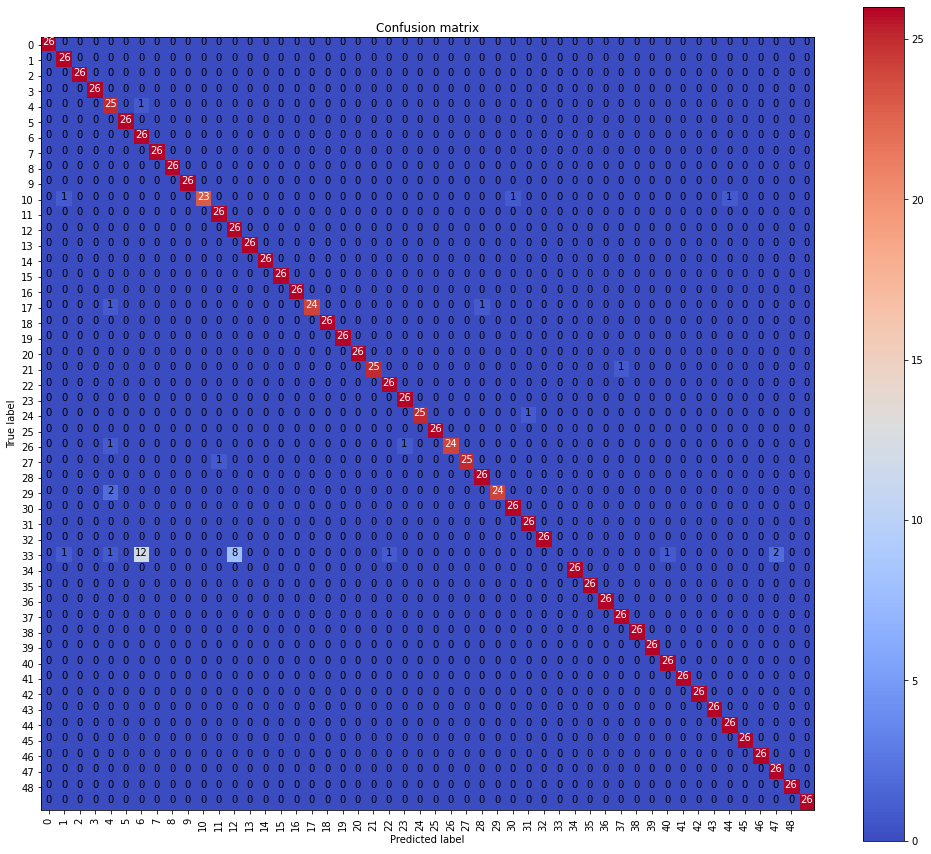

In [73]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(49)
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
   

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# Y_pred_classes = np.argmax(Y_pred,axis = 1)  
confusion_mtx = confusion_matrix(Y_classes, Y_pred_classes)
fig = plt.figure()
fig.set_size_inches(14,12)
plot_confusion_matrix(confusion_mtx, classes = range(49), 
                      title='Confusion Matrix')
